---

title: "Markov Chain Workshop"
author: "Adethya Srinivasan"
date: "12/11/2024"

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Markov Processes**

## Markov Chain

- A Markov Chain consists of states and transition probabilities


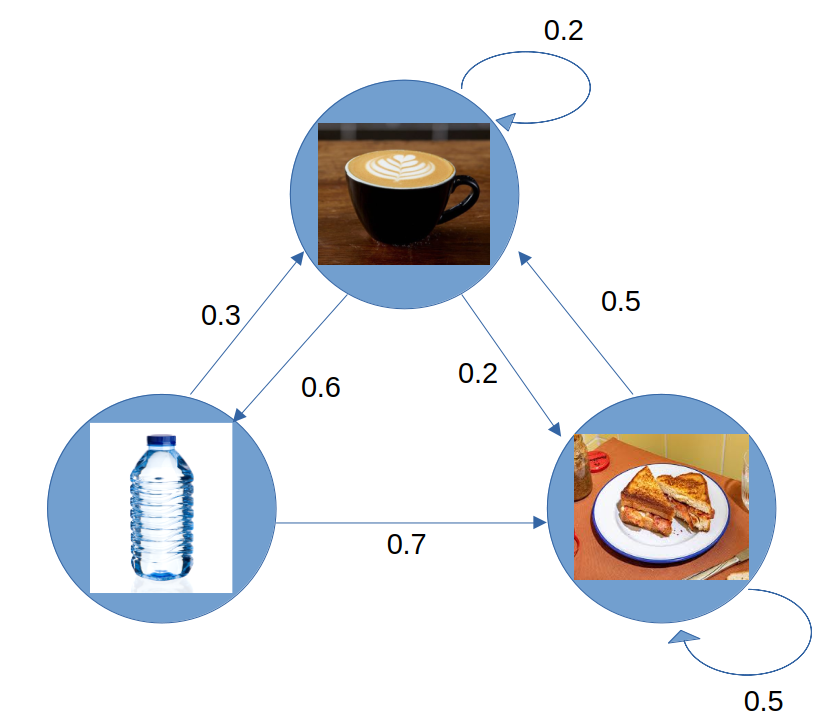

- There exists a coffee shop with only three items
- Each customer can order only one item $X_{i} = x_{i}$
- The item the next customer orders is influenced by the previous customer's item $P(X_{i+1} = x_{i+1} | X_{i} = x_{i})$ 

For example:
\begin{equation}
P(X_{2} = Coffee | X_{1} = Sandwich) = 0.5
\end{equation}

Note: All the transition probabilities leaving a state sum to 1

Note: We refer to Coffee, Water, Sandwich as $C,W,S$ respectively

## Markov Property

$\begin{align}
P(X_{n+1} = x_{n+1} | X_{n} = x_{n}, X_{n-1} = x_{n-1}, \dots X_{0} = x_{0}) &= P(X_{n+1} = x_{n+1} | X_{n} = x_{n}) \\
\\
\text{The probability of visiting the state $x_{n+1}$ depends on all previous visited states} &= \text{The probability of visiting states $x_{n+1}$ depends only on the previous state visited $x_{n}$}
\end{align}$

- Property of all Markov Processes 

## Stationary Distribution

Have three conditional probability distributions

Want to find one probability distribution which describes this Markov Chain such that $P(C) + P(W) + P(S) = 1$ - "Stationary Distribution"

### Methods

#### Random Walk

Take a random walk along this Markov Chain

After $n$ steps, where $n$ is large, we can find $P(C),P(W),P(S)$

For example:
$\begin{equation}
P(C) = \frac{\text{Occurences of C}}{\text{n steps}}
\end{equation}$

$\lim_{n \to \infty} \bigg[ P(C) = \frac{\text{Occurences of C}}{\text{n steps}} \bigg]$

As $n$ tends to infinity, the probabillities of $C,W,S$ converge

#### Drawbacks

- Computationally inefficient to model
- Only provides an approximation

In [2]:
state = {
    0 : "Coffee",
    1 : "Water",
    2 : "Sandwich"
}
state

{0: 'Coffee', 1: 'Water', 2: 'Sandwich'}

In [3]:
A = np.array([[0.2, 0.6, 0.2], [0.3, 0.0, 0.7], [0.5, 0.0, 0.5]])
A

array([[0.2, 0.6, 0.2],
       [0.3, 0. , 0.7],
       [0.5, 0. , 0.5]])

In [4]:
start_state = 0
curr_state = start_state
print(state[curr_state], "--->", end=" ")
steps = 10

seq = {
    0 : 0,
    1 : 0,
    2 : 0
}

for i in range(0, steps):
    curr_state = np.random.choice([0, 1, 2], p=A[curr_state]) # Transition to next state based on transition probabilities
    print(state[curr_state], "--->", end=" ")
    seq[curr_state] += 1 ## Increment dictionary value corresponding to state transitioned to
print("end")

# Calculate probabilities of C,W,S
print("P(C) = ", seq[0]/steps)
print("P(W) = ", seq[1]/steps)
print("P(S) = ", seq[2]/steps)

Coffee ---> Water ---> Sandwich ---> Sandwich ---> Coffee ---> Water ---> Sandwich ---> Coffee ---> Sandwich ---> Sandwich ---> Sandwich ---> end
P(C) =  0.2
P(W) =  0.2
P(S) =  0.6


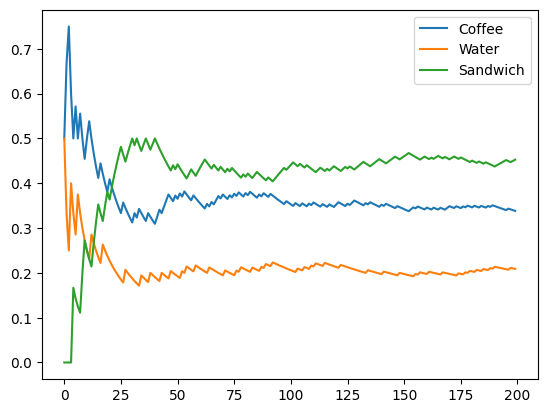

π =  0.3383084577114428 0.208955223880597 0.4527363184079602
Sum of probabilities 1.0


In [5]:
start_state = 0
curr_state = start_state
count = np.array([0, 0, 0])
count[start_state] = 1
steps = 200

C = []
W = []
S = []

for i in range(0, steps):
    curr_state = np.random.choice([0,1,2], p=A[curr_state]) # Transition to next state based on transition probabilities
    count[curr_state] += 1
    # Calculate current approximation of probabilities 
    C.append(count[0]/np.sum(count))
    W.append(count[1]/np.sum(count))
    S.append(count[2]/np.sum(count))

plt.plot(C, label="Coffee")
plt.plot(W, label="Water")
plt.plot(S, label="Sandwich")
plt.legend()
plt.show()
print("π = ", C[-1], W[-1], S[-1]) # Print the latest approximations 
print(f"Sum of probabilities {C[-1] + W[-1] + S[-1]}") # Show that the sum of the probabilities is 1

#### Iterative Matrix Multiplication

- Transition Matrix / Adjacency Matrix

$ \begin{bmatrix}
 & C & W & S \\
C & 0.2 & 0.6 & 0.2 \\
W & 0.3 & 0 & 0.7 \\
S & 0.5 & 0 & 0.5 
\end{bmatrix}  $

- Describes the transition probabilities in the Markov Chain

$ A = \begin{bmatrix}
0.2 & 0.6 & 0.2 \\
0.3 & 0 & 0.7 \\
0.5 & 0 & 0.5 
\end{bmatrix}  $

$\pi_{0}$ referring to the first state

$\pi_{0} = \begin{bmatrix}
0 & 1 & 0 
\end{bmatrix}$

Performing $\pi_{0}A$ we get $\pi_{1}$

$\begin{bmatrix}
0 & 1 & 0 
\end{bmatrix}
\begin{bmatrix}
0.2 & 0.6 & 0.2 \\
0.3 & 0 & 0.7 \\
0.5 & 0 & 0.5 
\end{bmatrix} = \begin{bmatrix}
0.3 & 0 & 0.7 
\end{bmatrix}  $

This is the transition probabilities from state $W$

$\begin{align}
\pi_{1}A &= \pi_{2} \\
\pi_{2}A &= \pi_{3} \\
\dots \\
\pi_{n-1}A &= \pi_{n}
\end{align}$

where $\pi_{n-1} = \pi_{n}$

##### Drawbacks

- Slightly less computationally inefficient to model
- Only provides an approximation

In [6]:
pi = [0, 1, 0]

for i in range(0, 10):
    pi =  np.matmul(pi, A)
    print("π = ", pi)

π =  [0.3 0.  0.7]
π =  [0.41 0.18 0.41]
π =  [0.341 0.246 0.413]
π =  [0.3485 0.2046 0.4469]
π =  [0.35453 0.2091  0.43637]
π =  [0.351821 0.212718 0.435461]
π =  [0.3519101 0.2110926 0.4369973]
π =  [0.35220845 0.21114606 0.43664549]
π =  [0.35210825 0.21132507 0.43656668]
π =  [0.35210251 0.21126495 0.43663254]


#### Simultaneous Equations

$\begin{align}
\pi A &= \pi \\
\pi A - \pi &= 0 \\
\pi (A - I) &= 0 \\
\end{align}$

$\begin{bmatrix}
\pi_1 & \pi_2 & \pi_3 
\end{bmatrix}
\begin{bmatrix}
-0.8 & 0.6 & 0.2 \\
0.3 & -1 & 0.7 \\
0.5 & 0 & -0.5 
\end{bmatrix} = 0 $

$
\begin{align}
-0.8 \pi_1 + 0.3 \pi_2 + 0.5 \pi_3 &= 0 \\
0.6 \pi_1 - \pi_2 &= 0 \\
0.2 \pi_1 + 0.7 \pi_2 - 0.5 \pi_3 &= 0
\end{align}
$

$
\begin{bmatrix}
\pi_1 & \pi_2 & \pi_3 \\ 
\end{bmatrix} = 
\begin{bmatrix}
\frac{25}{71} & \frac{15}{71} & \frac{31}{71} 
\end{bmatrix}
$

#### Matrix Maths

We have the constraint $P(C) + P(W) + P(S) = 1$ and we will rewrite this as $\pi_1 + \pi_2 + \pi_3 = 1$ to refer to the elements of $\pi$

$\begin{align}
\pi &= \pi A \\
\pi - \pi A &= 0 \\
\pi (I - A) &= 0 \\
(I - A)^{T} \pi^{T} &= 0 \\ 
\end{align}$

$
(I - A)^{T} = \begin{bmatrix}
0.8 & -0.3 & -0.5 \\
-0.6 & 1 & 0 \\
-0.2 & -0.7 & 0.5
\end{bmatrix}
$

We need to add the $\sum \pi_i = 1$ constraint so we create a new matrix P with this row added

$
P = \begin{bmatrix}
0.8 & -0.3 & -0.5 \\
-0.6 & 1 & 0 \\
-0.2 & -0.7 & 0.5 \\
1 & 1 & 1
\end{bmatrix}
$

This matrix is over-determined

$
P = \begin{bmatrix}
1 & 1 & 1 \\
-0.6 & 1 & 0 \\
-0.2 & -0.7 & 0.5 
\end{bmatrix}
$

So we have

$
\begin{bmatrix}
1 & 1 & 1 \\
-0.6 & 1 & 0 \\
-0.2 & -0.7 & 0.5 
\end{bmatrix}
\begin{bmatrix}
\pi_1 \\
\pi_2 \\
\pi_3 
\end{bmatrix} = 
\begin{bmatrix}
1 \\
0 \\
0 
\end{bmatrix}
$

Left-mulitplying by $P^{-1}$

$
\begin{bmatrix}
\pi_1 \\
\pi_2 \\
\pi_3 
\end{bmatrix} =
\begin{bmatrix}
\frac{25}{71} & -\frac{60}{71} & -\frac{50}{71} \\
\frac{15}{71} & \frac{35}{71} & -\frac{30}{71} \\
\frac{31}{71} & \frac{25}{71} & \frac{80}{71} 
\end{bmatrix}
\begin{bmatrix}
1 \\
0 \\
0 
\end{bmatrix}
$

So
$
\begin{bmatrix}
\pi_1 \\
\pi_2 \\
\pi_3 
\end{bmatrix} = 
\begin{bmatrix}
\frac{25}{71} \\
\frac{15}{71} \\
\frac{31}{71} 
\end{bmatrix}
$

In [7]:
P = (np.identity(3) - A).T
P[0] = [1, 1, 1]

pi = np.linalg.inv(P).dot(np.array([1, 0, 0]))

pi

array([0.35211268, 0.21126761, 0.43661972])

# Markovian Harry Potter

## Imports

In [8]:
import re
from nltk.tokenize import word_tokenize
import random
import nltk

## Reading The Chamber of Secrets

In [9]:
path = "kaggle/input/harry_potter/02 Harry Potter and the Chamber of Secrets.txt"

# Function which reads file and appends text line by line to 'txt' array
def read_story(path):
    txt = []

    with open(path) as f:
        for line in f:
            line = line.strip()
            if line!='':txt.append(line)
    
    return txt

story = read_story(path)
print("number of lines = ", len(story))

number of lines =  3216


## Cleaning the text

In [10]:
def clean_txt(txt):
    cleaned_txt = []
    for line in txt:
        line = line.lower() # Set all the letters to lowercase
        line = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\]", "", line) # Remove symbols/punctuation
        tokens = word_tokenize(line)
        words = [word for word in tokens if word.isalpha()] 
        cleaned_txt += words # Add word to array containing cleaned text
    return cleaned_txt

cleaned_story = clean_txt(story)
print("number of words = ", len(cleaned_story))

number of words =  87271


## Creating the Markov Model

In [11]:
def make_markov_model(cleaned_story, n_gram=2):
    # Find all transition states and the number of times they occur
    markov_model = {}
    for i in range(len(cleaned_story)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += cleaned_story[i+j] + " "
            next_state += cleaned_story[i+j+n_gram] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1
    
    # Calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total
        
    return markov_model

In [12]:
markov_model = make_markov_model(cleaned_story)

In [13]:
print("number of states = ", len(markov_model.keys()))

number of states =  45475


In [14]:
print("All possible transitions from 'chamber of' state: \n")
print(markov_model['chamber of'])

All possible transitions from 'chamber of' state: 

{'secrets chapter': 0.22807017543859648, 'secrets has': 0.05263157894736842, 'secrets what': 0.017543859649122806, 'secrets said': 0.07017543859649122, 'you all': 0.017543859649122806, 'secrets the': 0.017543859649122806, 'secrets so': 0.017543859649122806, 'secrets unleash': 0.017543859649122806, 'secrets ron': 0.017543859649122806, 'secrets for': 0.05263157894736842, 'secrets is': 0.07017543859649122, 'secrets harry': 0.03508771929824561, 'secrets was': 0.03508771929824561, 'secrets with': 0.017543859649122806, 'secrets his': 0.017543859649122806, 'secrets in': 0.017543859649122806, 'secrets fifty': 0.017543859649122806, 'secrets and': 0.05263157894736842, 'secrets closed': 0.017543859649122806, 'secrets they': 0.017543859649122806, 'secrets all': 0.017543859649122806, 'secrets out': 0.017543859649122806, 'secrets have': 0.017543859649122806, 'secrets he': 0.017543859649122806, 'secrets itself': 0.017543859649122806, 'secrets that':

## Text Generation

In [15]:
# Takes a random walk along the Markov chain to generate text
def generate(markov_model, limit=100, start='chamber of'):
    n = 0
    curr_state = start
    next_state = None
    story = ""
    story += curr_state + " "
    while n < limit:
        next_state = random.choices(list(markov_model[curr_state].keys()),
                                    list(markov_model[curr_state].values()))
        
        curr_state = next_state[0]
        story += curr_state + " "
        n += 1
    return story

In [16]:
for i in range(20):
    print(str(i+1)+". ", generate(markov_model, start="harry potter", limit=15))

1.  harry potter the crowd by kicking people s mouths will be it was hagrid frankly i m astounded professor mcgonagall oh professor can t get out at the empty fireplace where flames 
2.  harry potter must stay where he d gone and went to draw the curtains around his ankles he looked down in time to see who he was writing to all last summer 
3.  harry potter set dobby will serve the family uncle vernon s company made drills i think myrtle s bathroom he gasped what were you when that bludger stopped angelina scoring we were 
4.  harry potter set dobby will serve the family was a knock on the office flew open get fang harry yelled speeding up ginny s trunk to the car a grateful swig of 
5.  harry potter risks his own life for his timing hopefully whatever peeves had done one good thing hermione seemed to be hiding down her cheeks what if they re thinking it s 
6.  harry potter and sealed the gateway and dobby s eyes narrowed dangerously again and hermione and lucius malfoy stood frozen st

In [17]:
for i in range(20):
    print(str(i+1)+". ", generate(markov_model, start="hermione granger", limit=15))

1.  hermione granger standing at a doorway hung with black velvet they approached it eagerly but next moment had stopped in his tracks and harry s heart lightened considerably but you don t 
2.  hermione granger hermione raised a trembling hand excellent beamed lockhart quite excellent take ten points for gryffindor securing the house that had never happened before hermione said this was evidently a password 
3.  hermione granger knew my secret ambition what in your opinion you filthy little mudblood he spat harry knew by sight but had to move the sink had just left it was so 
4.  hermione granger hermione raised a trembling hand excellent beamed lockhart they will be roving around the walls from their labels harry could shut his ears in punishment don t you tell me 
5.  hermione granger always top in everything hermione beamed as she spoke and everyone shuffled forward for a better shot this is for her to ron and hermione walked straight past the doorway 
6.  hermione granger always t

In [18]:
for i in range(20):
    print(str(i+1)+". ", generate(markov_model, start="ron weasley", limit=15))

1.  ron weasley and hermione looked around one thing last time the chamber of secrets said harry they woke the next staircase without difficulty d you really think there s a fickle friend 
2.  ron weasley wasn t his idea of being innocent as the castle harry was at the back of his seat and was looking over harry s disappointment riddle led him not into 
3.  ron weasley and hermione about colin but hermione and millicent bulstrode s no pixie good thinking said ron you don t think he thought for a minute neither of them may well 
4.  ron weasley was outside harry s face all right he opened the chamber of secrets chapter six gilderoy lockhart t he next day however harry barely had time to regain power harry 
5.  ron weasley wasn t there i know the person who opened the trunk and showed him how it looked to old armando dippet on the one that scores goals three chasers on 
6.  ron weasley and hermione about colin and dobby but they can t we get a confession out of sight whenever he saw mr m

In [19]:
print(generate(markov_model, start="professor dumbledore", limit=500))

professor dumbledore sir i want it said harry we d had it he said it hedwig was still in the page into a whirl of dull deepset eyes harry scratched his ear in an hour to buy your schoolbooks said mrs weasley woke them all early the following wednesday did they find out harry i ve had loads of practice with the sugar tongs clamped to his nose began to laugh again it was like stepping through an icy shower but there is something you could be harry lay awake for hours that night said harry looking jealously at the entrance to gryffindor tower snape had made him stay behind to scrape tubeworms off the desks after a while said hermione waving her hand harry and ron to follow him harry almost said something apologetic to percy but caught himself just in time lockhart had barely left his only chance he rammed it onto a bed get madam pomfrey whispered dumbledore and hagrid had left when sitting right behind malfoy harry overheard him telling professor mcgonagall eagerly dumbledore didn t you h

# Looking Ahead

## Next Workshop

- Hidden Markov Models
- Forward Algorithm
- Viterbi Algorithm
- Baum-Welch ALgorithm

- Gaussian Mixture Models
- Monte Carlo Methods